In [1]:
import numpy as np
import pandas as pd

# **Loading the Boston House Datasets**

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Exploring Data

In [3]:
print("train data shape:",train_data.shape)
print("test data shape:",test_data.shape)

train data shape: (404, 13)
test data shape: (102, 13)


In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
print(train_targets)
#train_targets[0]

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [6]:
len(train_data[0])

13

In [7]:
#print(train_targets)
print(len(train_targets))
#(train_data, train_targets)
#print(train_data)
#print("length of training data is :",len(train_data))

404


# Preparing the Data

A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std
test_data -=mean
test_data /=std

In [9]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [10]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [11]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

Now we can notice that train_data[0] has been changed.

## Building Network

In [12]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()

  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer= 'rmsprop', loss='mse', metrics = ['mae'])
  return model

## **K-Fold Validation**

In [18]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print("Processinf Fold #", i)
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  val_mse, val_mae =model.evaluate(val_data, val_targets, verbose = 1)
  all_scores.append(val_mae)

Processinf Fold # 0
Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 362.9380 - mae: 16.1160
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 33.3755 - mae: 4.0833
Epoch 3/100
303/303 [==============================] - 0s 998us/step - loss: 20.4263 - mae: 2.9889
Epoch 4/100
303/303 [==============================] - 0s 998us/step - loss: 19.8958 - mae: 2.8423
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 19.7066 - mae: 2.8391
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 11.5159 - mae: 2.4139
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 10.3308 - mae: 2.3440
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 18.1913 - mae: 2.6968
Epoch 9/100
303/303 [==============================] - 0s 993us/step - loss: 10.5878 - mae: 2.2295
Epoch 10/100
303/303 [==============================] - 0s 1ms/step - loss: 7.2735 - mae: 2.0370
Ep

Running this with num_epochs = 100 yields the following results:

In [19]:
all_scores

[2.3733561038970947, 2.667166233062744, 2.774074077606201, 2.2834970951080322]

In [20]:
np.mean(all_scores)

2.524523377418518

## **Saving the Validation Log at each fold**

In [24]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data,val_targets),epochs = num_epochs, batch_size = 1, verbose = 1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing Fold # 0
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 344.0779 - mae: 15.9709 - val_loss: 38.8947 - val_mae: 4.1320
Epoch 2/500
303/303 [==============================] - 0s 1ms/step - loss: 38.4181 - mae: 4.4565 - val_loss: 23.5029 - val_mae: 3.0594
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 17.7968 - mae: 3.1853 - val_loss: 16.6134 - val_mae: 2.4976
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 16.2730 - mae: 2.7119 - val_loss: 14.8834 - val_mae: 2.6194
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 18.1748 - mae: 2.7915 - val_loss: 14.8284 - val_mae: 2.4882
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 11.5138 - mae: 2.4678 - val_loss: 12.6235 - val_mae: 2.4419
Epoch 7/500
303/303 [==============================] - 0s 1ms/step - loss: 13.8137 - mae: 2.5845 - val_loss: 11.1779 - val_mae: 2.0552
Epoch 8/500
303/303 [============

You can then compute the average of the per-epoch MAE scores for all folds

In [32]:
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] ) for i in range(num_epochs)]

In [34]:
print(average_mae_history)
print("Length of Average MAE History",len(average_mae_history))

[4.67473703622818, 3.295678734779358, 2.794953405857086, 2.81851464509964, 2.6777612566947937, 2.6284440755844116, 2.5839983224868774, 2.5467674136161804, 2.637815445661545, 2.422321766614914, 2.498735249042511, 2.508089601993561, 2.437816232442856, 2.6444495916366577, 2.526109039783478, 2.4399532675743103, 2.476612627506256, 2.531271278858185, 2.6151320934295654, 2.551693558692932, 2.434091091156006, 2.4947361946105957, 2.463029444217682, 2.4050792455673218, 2.5234498381614685, 2.4087913632392883, 2.38386869430542, 2.393622934818268, 2.3810501098632812, 2.3408920764923096, 2.5284550189971924, 2.4233217239379883, 2.368335038423538, 2.404278129339218, 2.3565635681152344, 2.3647125363349915, 2.3650019466876984, 2.3829516172409058, 2.4503077268600464, 2.400399088859558, 2.2601427733898163, 2.5862538516521454, 2.3684293627738953, 2.475622594356537, 2.524824321269989, 2.654192566871643, 2.539174735546112, 2.441695809364319, 2.4813257455825806, 2.399715483188629, 2.5454103350639343, 2.328220

## **Plotting Validation Score**

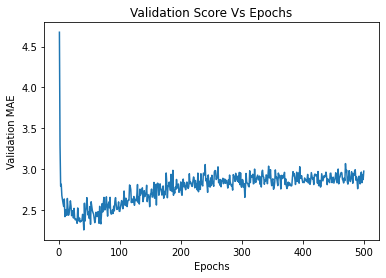

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Validation Score Vs Epochs")
plt.show()

## **Plotting validation scores, excluding the first 10 data points**

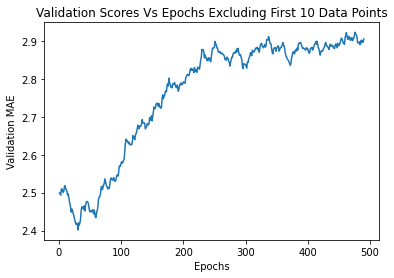

In [45]:
def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation Scores Vs Epochs Excluding First 10 Data Points')
plt.show()

## **Training The Final Model**

In [52]:
model = build_model()
model.fit(train_data, train_targets, epochs=35, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/35
26/26 [==============================] - 1s 1ms/step - loss: 502.4114 - mae: 20.6144
Epoch 2/35
26/26 [==============================] - 0s 1ms/step - loss: 295.9805 - mae: 14.9593
Epoch 3/35
26/26 [==============================] - 0s 1ms/step - loss: 130.5662 - mae: 9.1189
Epoch 4/35
26/26 [==============================] - 0s 2ms/step - loss: 65.6289 - mae: 6.2201
Epoch 5/35
26/26 [==============================] - 0s 1ms/step - loss: 35.9865 - mae: 4.2772
Epoch 6/35
26/26 [==============================] - 0s 1ms/step - loss: 26.4405 - mae: 3.6945
Epoch 7/35
26/26 [==============================] - 0s 1ms/step - loss: 20.6794 - mae: 3.1915
Epoch 8/35
26/26 [==============================] - 0s 1ms/step - loss: 22.9871 - mae: 3.2167
Epoch 9/35
26/26 [==============================] - 0s 1ms/step - loss: 15.6959 - mae: 2.8229
Epoch 10/35
26/26 [==============================] - 0s 1ms/step - loss: 14.6700 - mae: 2.7046
Epoch 11/35
26/26 [==============================] - 0

In [53]:
test_mae_score

2.9764554500579834

In [54]:
test_mse_score

21.03107261657715